<a href="https://colab.research.google.com/github/shisam2018/sciencewings/blob/master/Decision_Tree_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification of Duplicate and Original Banknotes or Bills**

**Step 1**: Importing Library


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Step 2**: Import Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bill_authentication.csv to bill_authentication.csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['bill_authentication.csv']))

**Step 3**: Exploratory Data Analysis

In [ ]:
dataset.shape

(1372, 5)

In [ ]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


**Step 4**: Data Preperation

In [ ]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

**Step 5**: Training & Classify

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)

**Step 6**: Evaluation of the Result

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[164   3]
 [  1 107]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       167
           1       0.97      0.99      0.98       108

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.98       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
242,0,0
997,1,1
1121,1,1
1083,1,1
392,0,0
...,...,...
1075,1,1
924,1,1
1277,1,0
1287,1,1


**Step 7**: Vizualisation

In [ ]:
from sklearn import tree

[Text(148.87622950819673, 203.85, 'X[0] <= 0.32\ngini = 0.496\nsamples = 1097\nvalue = [595, 502]'),
 Text(87.81639344262295, 176.67000000000002, 'X[1] <= 7.509\ngini = 0.288\nsamples = 533\nvalue = [93, 440]'),
 Text(54.885245901639344, 149.49, 'X[0] <= -0.389\ngini = 0.112\nsamples = 453\nvalue = [27, 426]'),
 Text(21.95409836065574, 122.31, 'X[2] <= 6.162\ngini = 0.055\nsamples = 391\nvalue = [11, 380]'),
 Text(10.97704918032787, 95.13, 'gini = 0.0\nsamples = 267\nvalue = [0, 267]'),
 Text(32.93114754098361, 95.13, 'X[1] <= -4.675\ngini = 0.162\nsamples = 124\nvalue = [11, 113]'),
 Text(21.95409836065574, 67.94999999999999, 'gini = 0.0\nsamples = 112\nvalue = [0, 112]'),
 Text(43.90819672131148, 67.94999999999999, 'X[0] <= -2.117\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(32.93114754098361, 40.77000000000001, 'X[2] <= 6.615\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(21.95409836065574, 13.590000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(43.90819672

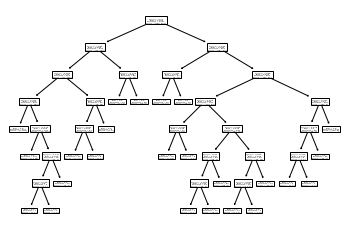

In [ ]:
tree.plot_tree(classifier)

In [ ]:
from sklearn.externals.six import StringIO

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
from sklearn.tree import export_graphviz
from pydot import graph_from_dot_data
from IPython.display import Image

In [ ]:
#from sklearn.datasets import load_iris

In [ ]:
#split dataset in features and target variable
feature_cols = ['Variance',	'Skewness',	'Curtosis',	'Entropy']
X = dataset[feature_cols] # Features
y = dataset.Class # Target variable

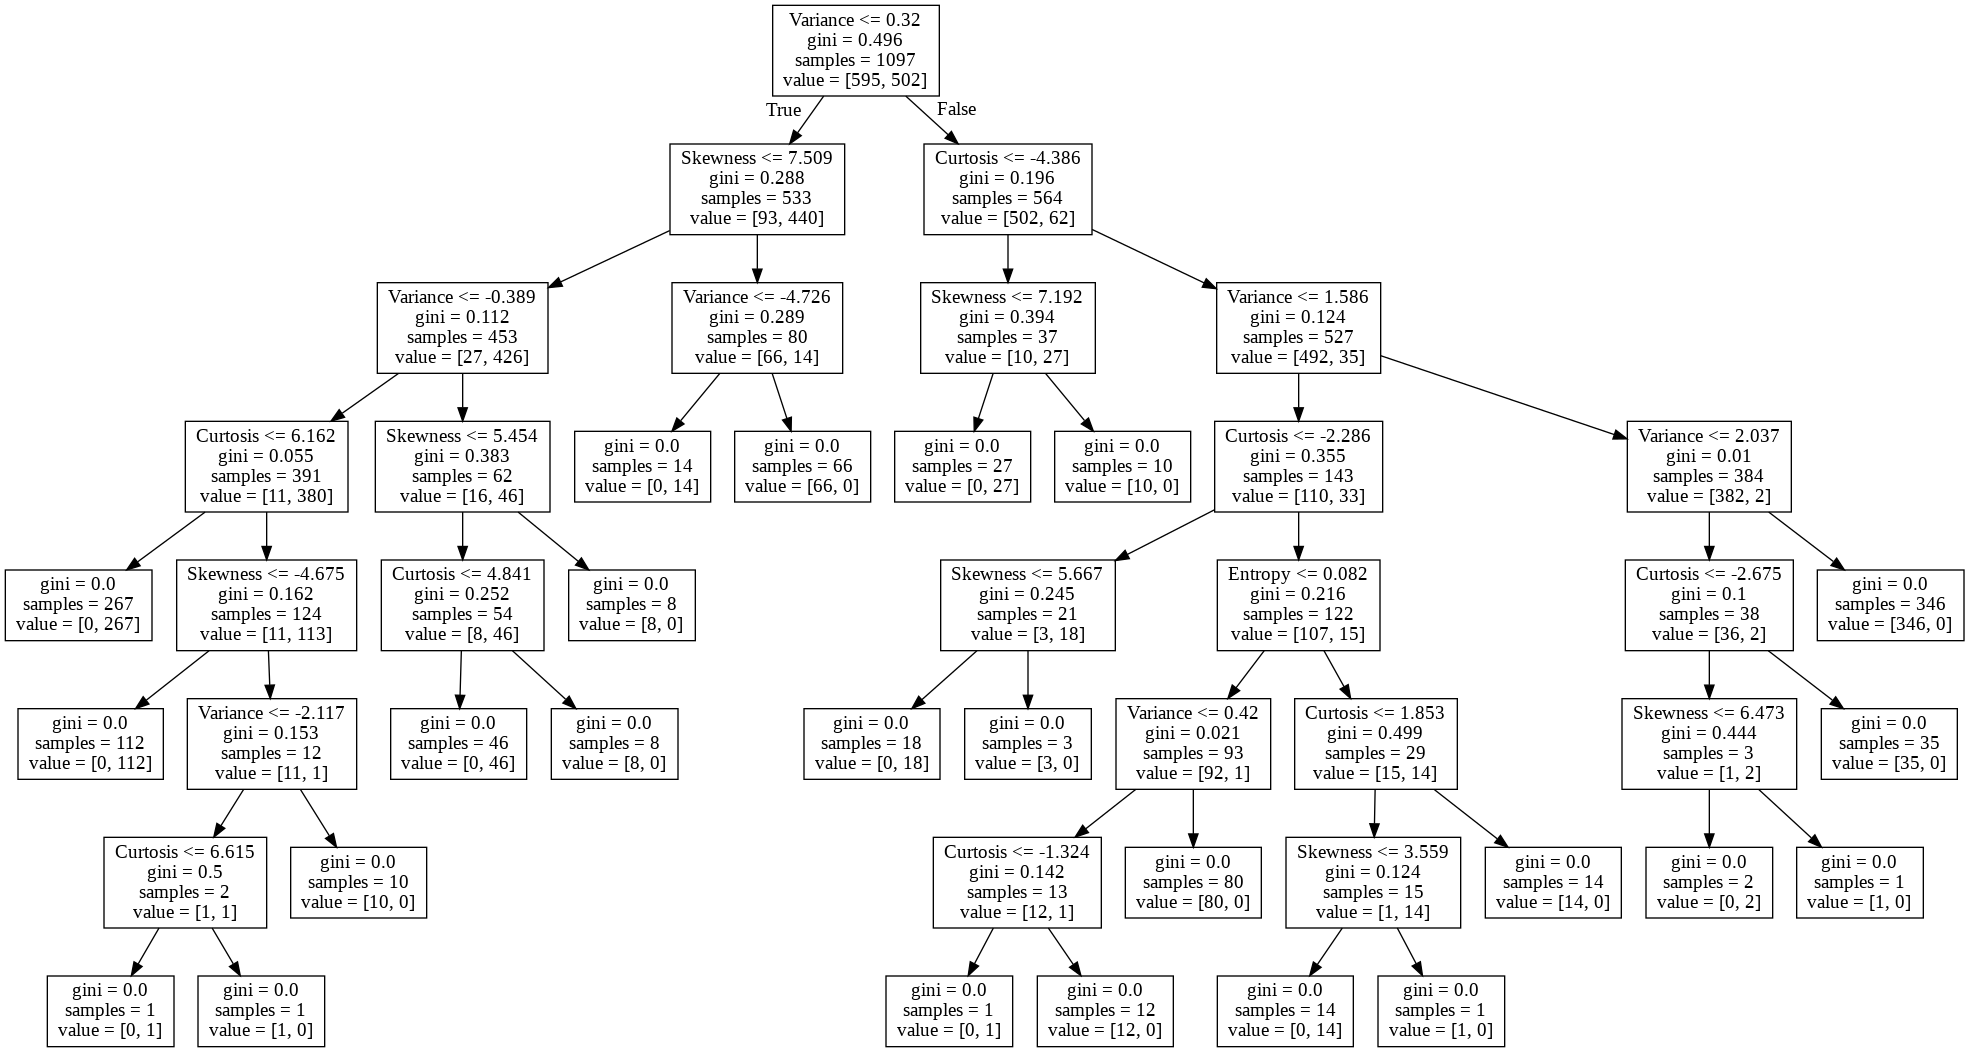

In [ ]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=feature_cols)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

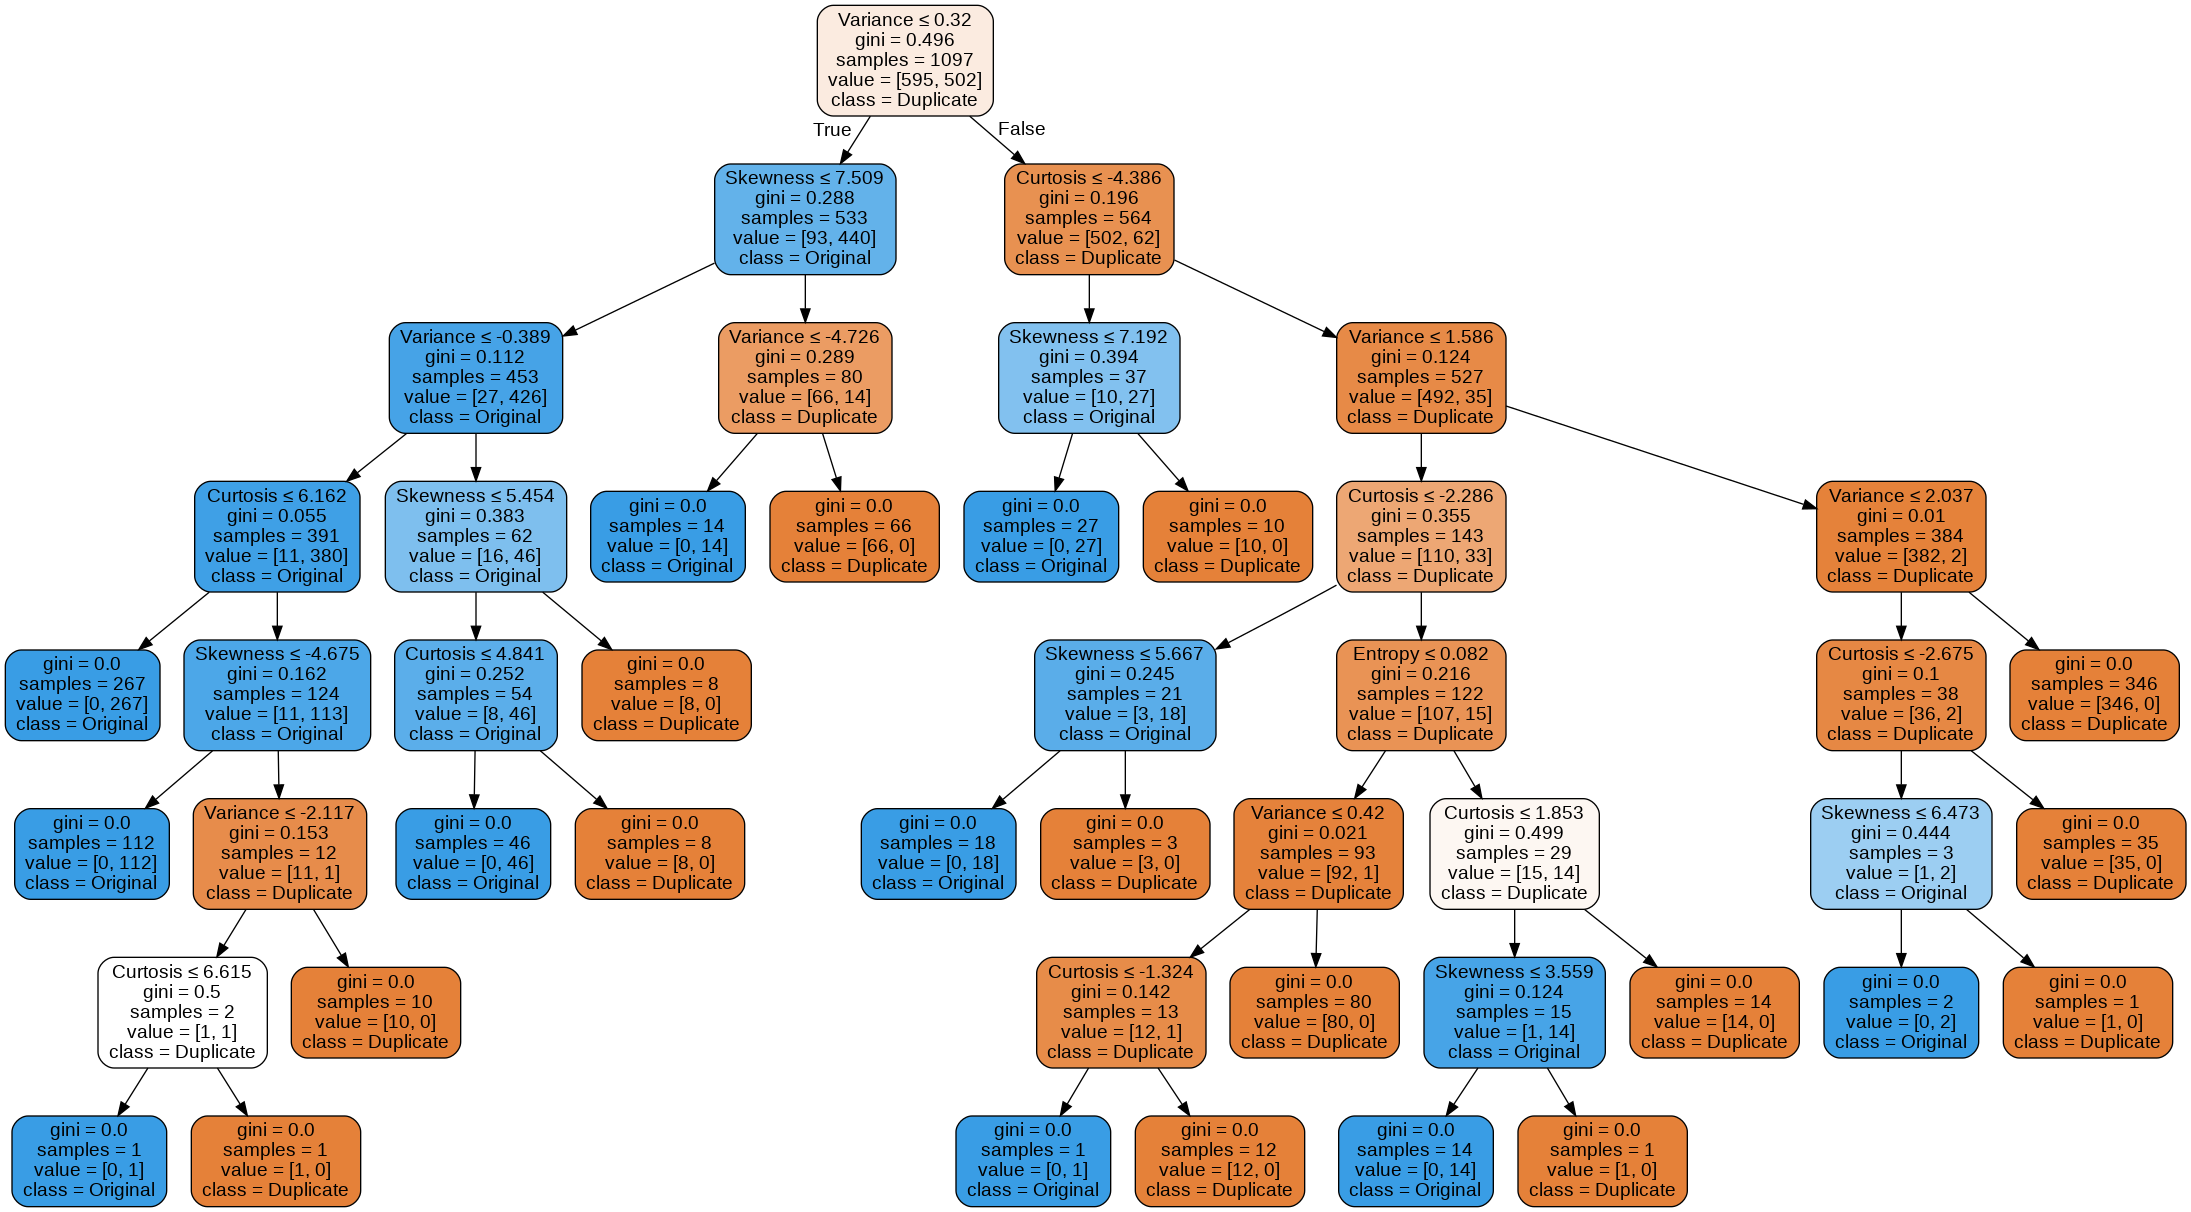

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = feature_cols, class_names=['Duplicate','Original'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bill.png')
Image(graph.create_png())